# Overview

This notebook takes a look at time-series data. The objective is to find the time of year at which the Environmental Defense Fund (EDF) will receive the highest level of donations relative to advertising and promotional efforts. The assumption for this section of the repo is that donations will rise proportionately with climate change sentiment. Therefore, the EDF will want to do the most advertising during months with the highest climate change sentiment and the least advertising during months with the lowest climate change sentiment. This notebook includes the following sections:

1. [Imports](#Imports)  
2. [Data by Time Frame](#Data-by-Time-Frame)  
    a. [Daily](#Daily)  
    b. [Weekly](#Weekly)   
    c. [Monthly](#Monthly)   
    d. [Yearly](#Yearly)
3. [Checking for Seasonality](#Checking-for-Seasonality)
4. [Forecasting Climate Change Sentiment](#Forecasting-Climate-Change-Sentiment)  
    a. [SARIMA Model](#SARIMA-Model)  
    b. [Checking Forecasting Accuracy](#Checking-Forecasting-Accuracy)  
    c. [Producing Forecasts](#Producing-Forecasts)
5. [Conclusion](#Conclusion)

# Imports

In [150]:
import itertools
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')
%matplotlib inline
plt.rcParams['lines.linewidth'] = 5
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['axes.prop_cycle'].by_key()['color'] = ['blue','orange','pink']
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['figure.figsize'] = 16, 8
plt.rcParams['font.size'] = 20
plt.rcParams['font.weight'] = 'bold'

In [151]:
# csv for time series data
daily = pd.read_csv('./data/time_series_daily_data.csv',index_col=0)
# Setting inded to datetime
daily.index = pd.to_datetime(daily.index)
# Checking dataframe
daily.head()

,sentiment
date,
2009-12-31,22.39
2010-01-01,33.56
2010-01-02,37.18
2010-01-03,22.55
2010-01-04,31.96


# Data by Time Frame

In this section, the time series data will be graphed by by averages the sentiment by day, by week, by month, and by year to get a feel for how the data looks in the represented time frame (2010-2020). 

The data graphs below show that, while the day-to-day sentiment for climate change is very sporadic, there is a clear trend upwards. Overall, we can conclude that there is an upward trend for climate change sentiment that appears to be cyclical in nature. Unfortunately, there are no clear conclusions to draw from the standard deviation of the data since its movement across time appears to be more random than anything else.

## Daily

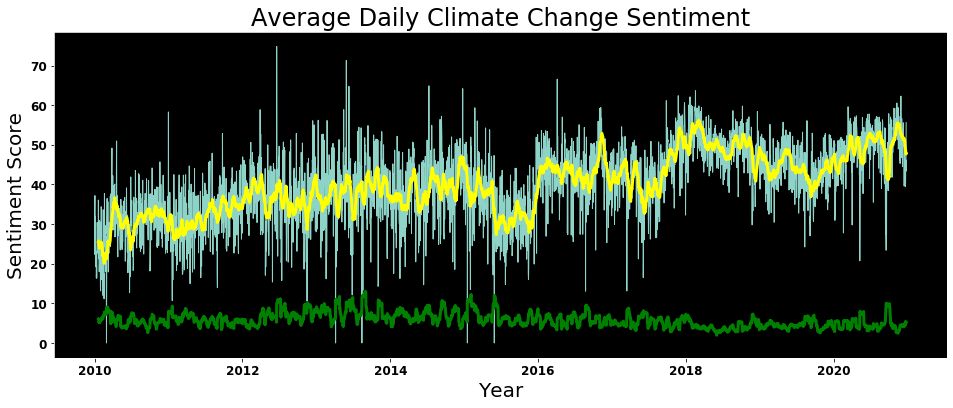

In [10]:
# Creating rolling mean with window of 20 days
day_roll_mean_20 = daily.rolling(window=20, center=False).mean()
# Creating rolling standard deviation with window of 20 days
day_roll_std_20 = daily.rolling(window=20, center=False).std()

# Plotting daily data
plt.figure(figsize=(16,6))
plt.plot(daily, linewidth=1)
plt.plot(day_roll_mean_20, linewidth=3,color='yellow')
plt.plot(day_roll_std_20, linewidth=3,color='green')
plt.title("Average Daily Climate Change Sentiment", color = 'black')
plt.xlabel('Year')
plt.ylabel('Sentiment Score')
plt.show()

## Weekly

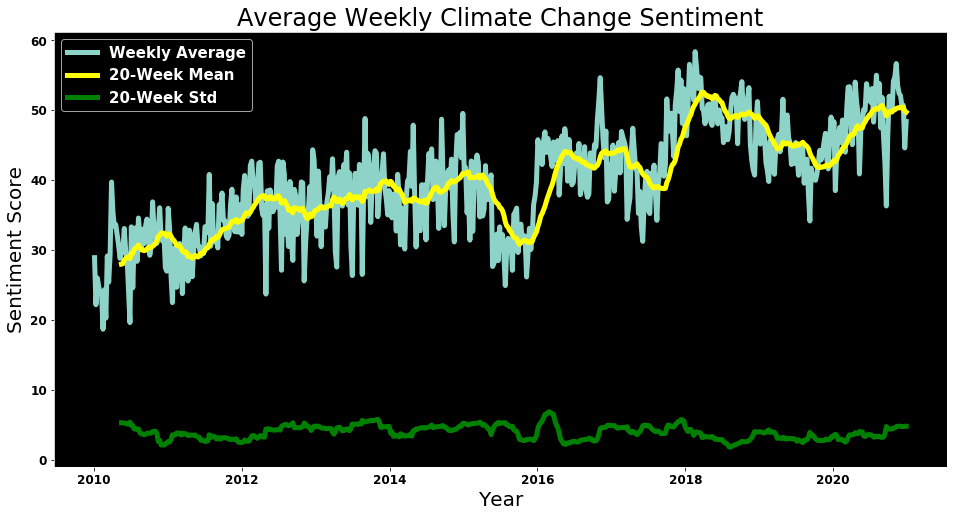

In [4]:
# Resampling data by week
weekly_mean = daily.resample('W').mean()
# Creating rolling mean with window of 20 weeks
week_roll_mean_20 = weekly_mean.rolling(window=20, center=False).mean()
# Creating rolling standard deviation with window of 20 weeks
week_roll_std_20 = weekly_mean.rolling(window=20, center=False).std()

# Plotting weekly data
plt.plot(weekly_mean, label='Weekly Average', linewidth=5)
plt.plot(week_roll_mean_20, label='20-Week Mean', linewidth=5,color='yellow')
plt.plot(week_roll_std_20, label='20-Week Std', linewidth=5,color='green')
plt.title("Average Weekly Climate Change Sentiment", color = 'black')
plt.xlabel('Year')
plt.ylabel('Sentiment Score')
plt.legend(loc='upper left',fontsize=15)

## Monthly

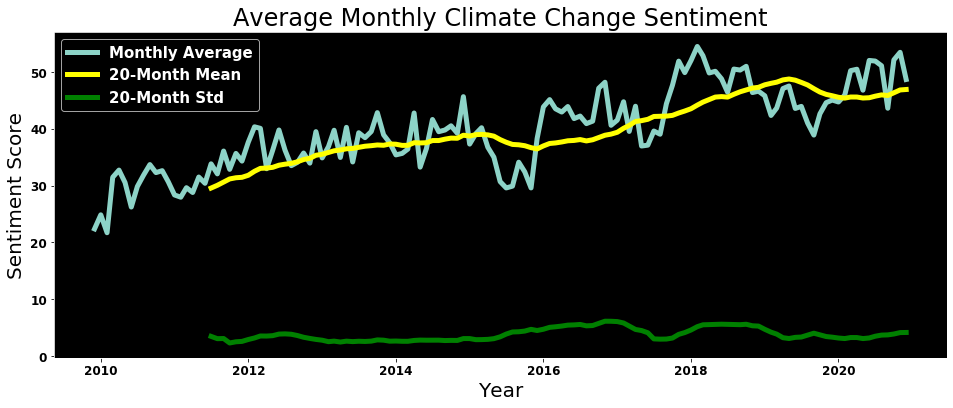

In [5]:
# Resampling data by month
monthly_mean = daily.resample('MS').mean()
# Creating rolling mean with window of 20 months
month_roll_mean_20 = monthly_mean.rolling(window=20, center=False).mean()
# Creating rolling standard deviation with window of 20 weeks
month_roll_std_20 = monthly_mean.rolling(window=20, center=False).std()

# Plotting monthly data
plt.figure(figsize=(16,6))
plt.plot(monthly_mean, label='Monthly Average')
plt.plot(month_roll_mean_20, label='20-Month Mean', color='yellow')
plt.plot(month_roll_std_20, label='20-Month Std',color='green')
plt.title("Average Monthly Climate Change Sentiment", color = 'black')
plt.xlabel('Year')
plt.ylabel('Sentiment Score')
plt.legend(loc='upper left',fontsize=15)

## Yearly

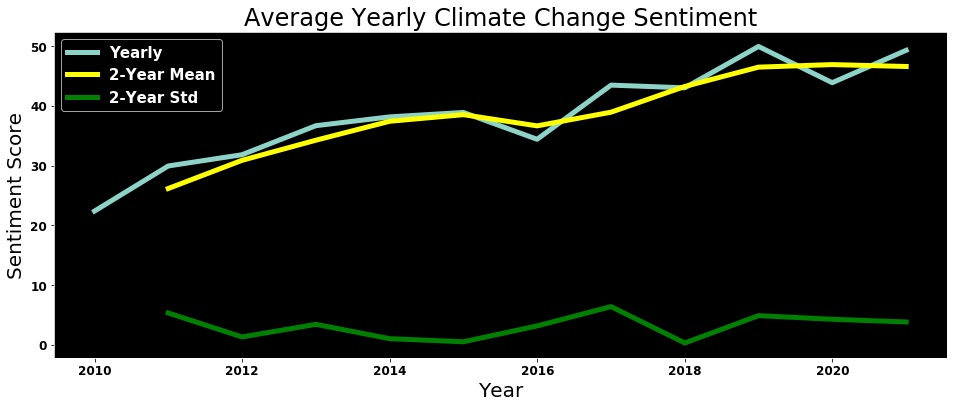

In [6]:
# Resampling data by year
yearly_mean = daily.resample('Y').mean()
# Creating rolling mean with window of 2 years
year_roll_mean_2 = yearly_mean.rolling(window=2, center=False).mean()
# Creating rolling standard deviation with window of 2 years
year_roll_std_2 = yearly_mean.rolling(window=2, center=False).std()

# Plotting yearly data
plt.figure(figsize=(16,6))
plt.plot(yearly_mean, label='Yearly', linewidth=5)
plt.plot(year_roll_mean_2, label='2-Year Mean', linewidth=5,color='yellow')
plt.plot(year_roll_std_2, label='2-Year Std', linewidth=5,color='green')
plt.title("Average Yearly Climate Change Sentiment", color = 'black')
plt.xlabel('Year')
plt.ylabel('Sentiment Score')
plt.legend(loc='upper left',fontsize=15)

# Checking for Seasonality

As mentioned in the overview, it will be helpful for the EDF to know, by month, when to deploy advertising and promotions in an effort to receive donations. Below is a breakdown of that idea, which includes the months where donations should, according to the assumption in the overview, represent the highest and lowest donations of the year. 

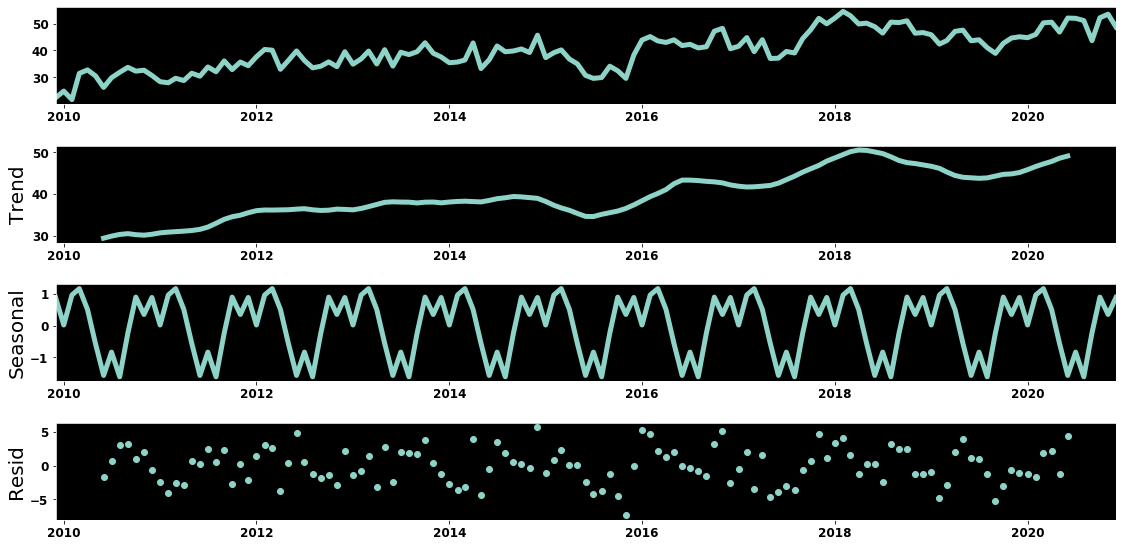

In [33]:
# Creating seasonal decomposition
decomposition = sm.tsa.seasonal_decompose(monthly_mean, model='additive')
# Plotting decomposition
fig = decomposition.plot()
plt.show()

It is clear from the decomposition graph above that climate change sentiment does possess a seasonal element. Therefore, it makes sense to now see what months of the year climate change sentiment is at its highest and what months of the year its at its lowest. 

In [ ]:
# Creating dataframe out of seasonal data
seasonal_data = pd.DataFrame(decomposition.seasonal)
# Setting index to datetime
seasonal_data.index = pd.to_datetime(seasonal_data.index)
# Getting months where sentiment is above average
above_average_sentiment = list(set(seasonal_data[seasonal_data.seasonal > 0].index.month))
# Getting months where sentiment is below average
below_average_sentiment = list(set(seasonal_data[seasonal_data.seasonal < 0].index.month))
# Checking for highest sentiment month
highest_value = seasonal_data[seasonal_data.seasonal > 0].max()
highest_sentiment_month = seasonal_data[seasonal_data.seasonal == highest_value[0]].index[0].month
# Checking for lowest sentiment month
lowest_value = seasonal_data[seasonal_data.seasonal < 0].min()
lowest_sentiment_month = seasonal_data[seasonal_data.seasonal == lowest_value[0]].index[0].month

In [75]:
# Printing sentiment above and below average
print('Climate change sentiment above average months: {}'.format(above_average_sentiment))
print('Climate change sentiment below average months: {}'.format(below_average_sentiment))
print('\n')
# Printing highest and lowest sentiment
print('Highest climate change sentiment month: {}'.format(highest_sentiment_month))
print('Lowest climate change sentiment month: {}'.format(lowest_sentiment_month))

Climate change sentiment above average months: [1, 2, 3, 4, 10, 11, 12]
Climate change sentiment below average months: [5, 6, 7, 8, 9]


Highest climate change sentiment month: 3
Lowest climate change sentiment month: 8


# Forecasting Climate Change Sentiment

In order to find out the donations the EDF can expect to receive in the future, it is essential to forecast climate change sentiment into the future. In order to do this, a SARIMA model will be used because of the seasonality element that was found above. The forecast will be accomplished using the SARIMA model that is fit to the climate change monthly mean data. 

## SARIMA Model

In [82]:
# Naming range 0-2 as p, d, and q
p = d = q = range(0, 2)
# Getting cartesian product
pdq = list(itertools.product(p, d, q))
# Setting variable equal to pdq plus 12
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [128]:
# Finding order and seasonal_order with lowest AIC
all_params = []
all_param_seasonal = []
all_test_results = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        test_mod = sm.tsa.statespace.SARIMAX(monthly_mean,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
        
        test_results = test_mod.fit()
        all_params.append(param)
        all_param_seasonal.append(param_seasonal)
        all_test_results.append(test_results.aic)
        
best_test_results = min(all_test_results)
best_test_results_index = all_test_results.index(best_test_results)

# Printing order and seasonal_order params with best results
print('Order: {}'.format(all_params[best_test_results_index]))
print('Seasonal Order: {}'.format(all_param_seasonal[best_test_results_index]))

Order: (0, 1, 1)
Seasonal Order: (0, 1, 1, 12)


In [138]:
# Building and fitting model
mod = sm.tsa.statespace.SARIMAX(monthly_mean,
                                order=(0,1,1),
                                seasonal_order=(0,1,1,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

# Fitting model
results = mod.fit()

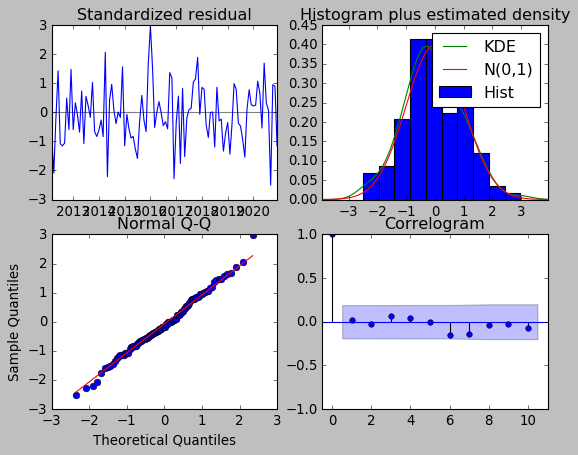

In [144]:
# Plotting results diagnostics
plt.style.use('classic')
results.plot_diagnostics()
plt.show()

From the noraml Q-Q plot, we can see that we have find a rather straight line, which tells us that we have no systematic departure from normality. Additionally, the Correlogram tells us that there is no autocorrelation in the residuals, marking them as white noise. 

## Checking Forecasting Accuracy

To test the accuracy of the SARIMA model, predictions will be made on past data below. The predictions represent the model's forecasts, which we will be able to judge the accuracy of given we are forecasted on data we possess.

In [155]:
# Creating predictions for past data
pred = results.get_prediction(start = pd.to_datetime('2015-01-01'),
                              dynamic = False)
# Creating variable for pred confidence interval
pred_ci = pred.conf_int()

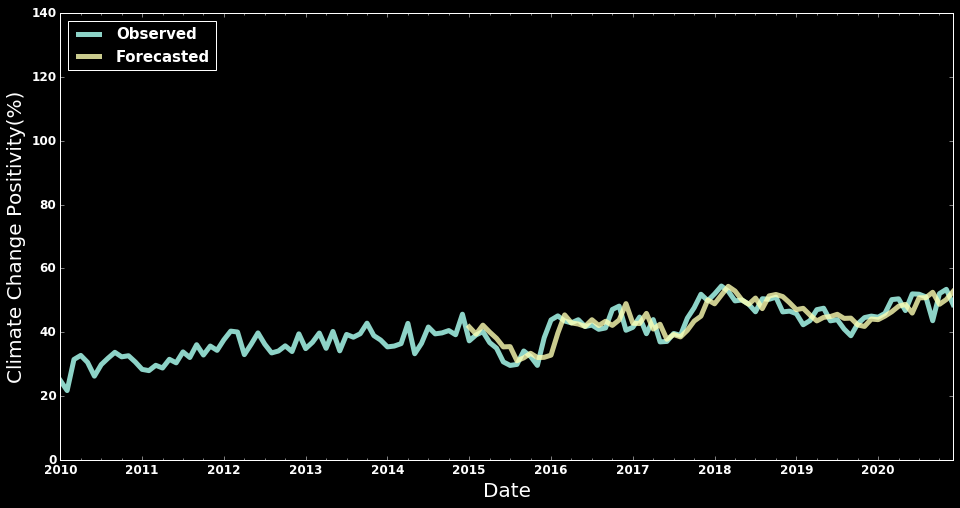

In [222]:
# Plotting predictions
plt.style.use('dark_background')
ax = monthly_mean['2010':].plot(label='Observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=0.8)

# Plotting 95% confidence interval
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='white', alpha=.3)

# Setting graph specifications
ax.set_xlabel('Date')
ax.set_ylabel('Climate Change Positivity(%)')
plt.legend(loc='upper left',fontsize=15, labels=['Observed','Forecasted'])

In [172]:
# Created forecasted predictions list
y_forecasted = (pred.predicted_mean).to_list()
# Getting true values list
y_truth = monthly_mean['2015-01-01':]
y_truth = y_truth.sentiment.to_list()
# Calculating MSE
MSE = mean_squared_error(y_truth, y_forecasted)
print('The Mean Squared Error of our forecasts is {}'.format(round(MSE, 2)))
# Calculating RMSE
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(MSE), 2)))

The Mean Squared Error of our forecasts is 13.52
The Root Mean Squared Error of our forecasts is 3.68


## Producing Forecasts

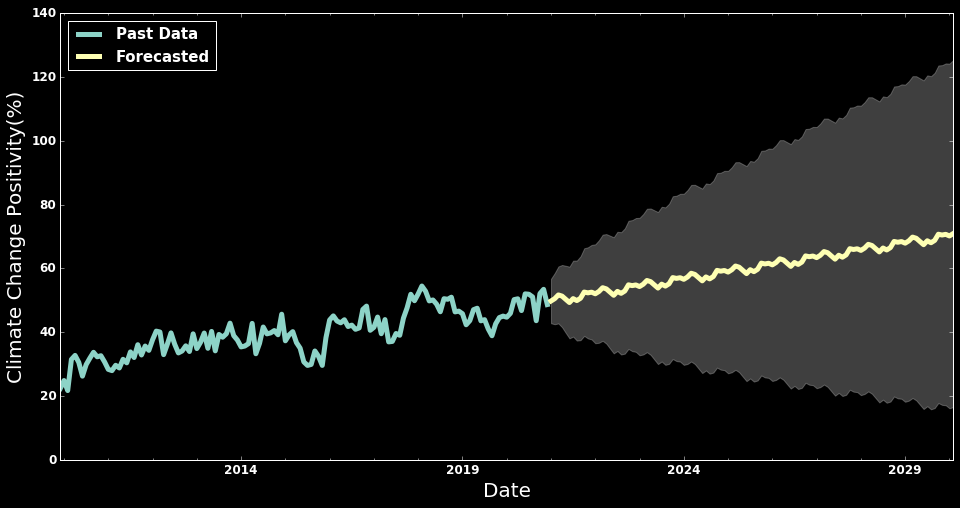

In [207]:
# Creating forcast for next 100 months
pred_uc = results.get_forecast(steps=110)
# Getting 95% confidence interval for forecast
pred_ci = pred_uc.conf_int()

# Plotting forecasts
ax = monthly_mean.plot()
pred_uc.predicted_mean.plot(ax=ax)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='white', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Climate Change Positivity(%)')
plt.legend(loc='upper left',fontsize=15, labels=['Past Data', 'Forecasted'])
plt.show()

In [221]:
# Turning forecasts into time series dataframe
forecasted = pd.DataFrame(pred_uc.predicted_mean)
forecasted.index = pd.to_datetime(forecasted.index)
forecasted.columns = ['year_avg']
# Resampling by year
forecasted = forecasted.resample('Y').mean()
# Calculating average growth rate
g = (((forecasted.year_avg[-1] - forecasted.year_avg[0]) / (forecasted.year_avg[0])) / 10) * 100
g = round(g,2)
# Printing growth rate
print('Climate change sentiment positivity % will grow at an average rate of {}% for the next 10 years'.format(g))

Climate change sentiment positivity % will grow at an average rate of 3.84% for the next 10 years


# Conclusion

There are three parts to this time series analysis above. Therefore, there are three conclusions to be drawn. Keep in mind that all conclusions are based on the assumption that climate change sentiment and donations to the EDF rise in tandom. If this assumption proves to be incorrect, the assumptions that have been drawn below do not hold. They are as follows:

1. There is a clear upward trend in climate change sentiment. Therefore, it is to be expected that donations have also been trending upward in the last 10 years.
2. Climate change sentiment is seasonal. The months where climate change sentiment is above average are: January, February, March, April, October, November and December. The months where climate change sentiment is below average are: May, June, July, August and September. A personal conclusion drawn from these results is that climate change sentiment is higher in the colder months because of the awareness of higher temperature in the last 10 years. Furthermore, the month that the EDF can expect to get the most donations is in March when climate change sentiment is the highest; in August, when climate change sentiment is the lowest, the EDF can expect to receive the fewest donations. 
3. A continuation on the first conclusion, the EDF can expect to see donations go up 3.8% per year over the next 10 years. 